# Decision Tree


* 여러분은 OO 통신화사 데이터분석가 입니다.
* 회사는 약정기간이 끝난 고객이 번호이동(이탈)해 가는 문제를 해결하고자 합니다.
* 그래서 여러분에게, 어떤 고객이 번호이동(이탈)해 가는지 예측 모델링을 의뢰하였습니다.

## 1.환경준비

### (1) import

In [ ]:
#라이브러리들을 불러오자.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

### (2) 데이터 준비

In [ ]:
# 데이터를 불러옵시다.
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/mobile_cust_churn.csv'
data = pd.read_csv(path)
data.head()

,id,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,1,0,31953,0,6,313378,161,0,4,unsat,little,no,STAY
1,2,1,36147,0,13,800586,244,0,6,unsat,little,considering,STAY
2,3,1,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,STAY
3,4,0,120070,38,33,788235,780,3,2,unsat,very_high,considering,LEAVE
4,5,1,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,STAY


* 변수설명
    * COLLEGE : 대학 졸업여부
    * INCOME : 연수입
    * OVERAGE : 월평균 초과사용 시간(분)
    * LEFTOVER : 월평균 잔여시간비율(%)
    * HOUSE : 집값
    * HANDSET_PRICE : 스마트폰 가격
    * OVER_15MINS_CALLS_PER_MONTH : 월평균 장기통화(15분이상) 횟수
    * AVERAGE_CALL_DURATION : 평균 통화 시간
    * REPORTED_SATISFACTION : 만족도 설문조사 결과
    * REPORTED_USAGE_LEVEL : 사용도 자가진단 결과
    * CONSIDERING_CHANGE_OF_PLAN : 향후 변경계획 설문조사 결과
    * CHURN : 이탈(번호이동) 여부 (Target 변수)


## 2.데이터 전처리

### (1) 변수정리
* 불필요한 변수를 정리합시다.
    * 식별자 : 일련번호, 주민번호, 전화번호, 고객ID, 사번
    * 시계열 데이터 중 : 어떤 기간동안 거의 변화가 없는 값.(변동이 거의 없는) 값.


In [ ]:
drop_cols = ['id']
data.drop(drop_cols, axis = 1, inplace = True )

### (2) x,y 분할

In [ ]:
target = 'CHURN'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

### (3) 가변수화

가변수화를 수행하시오.

In [ ]:
dumm_cols = ['REPORTED_SATISFACTION','REPORTED_USAGE_LEVEL','CONSIDERING_CHANGE_OF_PLAN']
x = pd.get_dummies(x, columns = dumm_cols, drop_first = True)

In [ ]:
x.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION_sat,REPORTED_SATISFACTION_unsat,REPORTED_SATISFACTION_very_sat,REPORTED_SATISFACTION_very_unsat,REPORTED_USAGE_LEVEL_high,REPORTED_USAGE_LEVEL_little,REPORTED_USAGE_LEVEL_very_high,REPORTED_USAGE_LEVEL_very_little,CONSIDERING_CHANGE_OF_PLAN_considering,CONSIDERING_CHANGE_OF_PLAN_never_thought,CONSIDERING_CHANGE_OF_PLAN_no,CONSIDERING_CHANGE_OF_PLAN_perhaps
0,0,31953,0,6,313378,161,0,4,False,True,False,False,False,True,False,False,False,False,True,False
1,1,36147,0,13,800586,244,0,6,False,True,False,False,False,True,False,False,True,False,False,False
2,1,27273,230,0,305049,201,16,15,False,True,False,False,False,False,False,True,False,False,False,True
3,0,120070,38,33,788235,780,3,2,False,True,False,False,False,False,True,False,True,False,False,False
4,1,29215,208,85,224784,241,21,1,False,False,False,True,False,True,False,False,False,True,False,False


### (4) train, val 분할

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

## 3.모델링

### (1) 필요한 함수 불러오기

In [ ]:
# 모델링을 위해
from sklearn.tree import DecisionTreeClassifier

# 평가를 위해.
from sklearn.metrics import *

### (2) 선언

In [ ]:
model = DecisionTreeClassifier()

### (3) 모델링(학습)

In [ ]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

### (4) 검증 : 예측

In [ ]:
pred = model.predict(x_val)

### (5) 검증 : 평가

* confusion matrix

In [ ]:
confusion_matrix(y_val, pred)

array([[1150,  812],
       [ 726, 1312]])

* classification report

In [ ]:
print(classification_report(y_val, pred, digits = 4))

              precision    recall  f1-score   support

       LEAVE     0.6130    0.5861    0.5993      1962
        STAY     0.6177    0.6438    0.6305      2038

    accuracy                         0.6155      4000
   macro avg     0.6154    0.6150    0.6149      4000
weighted avg     0.6154    0.6155    0.6152      4000



## 3.Decision Tree 추가 내용

### (1) 모델 시각화

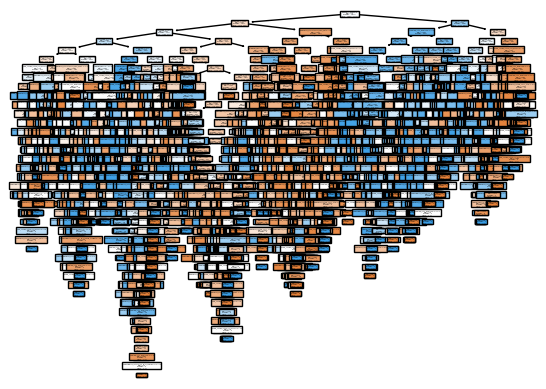

In [ ]:
# 시각화
from sklearn.tree import plot_tree

plot_tree(model,
          feature_names = x_train.columns,
          filled = True);

* 모델을 작게 만들어 봅시다.

[Text(0.5, 0.875, 'HOUSE <= 600636.0\ngini = 0.5\nsamples = 16000\nvalue = [7890.0, 8110.0]'),
 Text(0.25, 0.625, 'OVERAGE <= 106.5\ngini = 0.486\nsamples = 10611\nvalue = [6179, 4432]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'LEFTOVER <= 24.5\ngini = 0.499\nsamples = 7110\nvalue = [3389, 3721]'),
 Text(0.0625, 0.125, 'gini = 0.483\nsamples = 4713\nvalue = [1926, 2787]'),
 Text(0.1875, 0.125, 'gini = 0.476\nsamples = 2397\nvalue = [1463, 934]'),
 Text(0.375, 0.375, 'REPORTED_SATISFACTION_very_sat <= 0.5\ngini = 0.324\nsamples = 3501\nvalue = [2790, 711]'),
 Text(0.3125, 0.125, 'gini = 0.337\nsamples = 2648\nvalue = [2081, 567]'),
 Text(0.4375, 0.125, 'gini = 0.281\nsamples = 853\nvalue = [709, 144]'),
 Text(0.75, 0.625, 'INCOME <= 100357.5\ngini = 0.433\nsamples = 5389\nvalue = [1711, 3678]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'AVERAGE_CALL_DURATION <= 9.5\ngini = 0.304\nsamples = 3627\nvalue = [679, 2948]'),
 Text(0.5625, 0.125, 'gini = 0.292\nsamples = 27

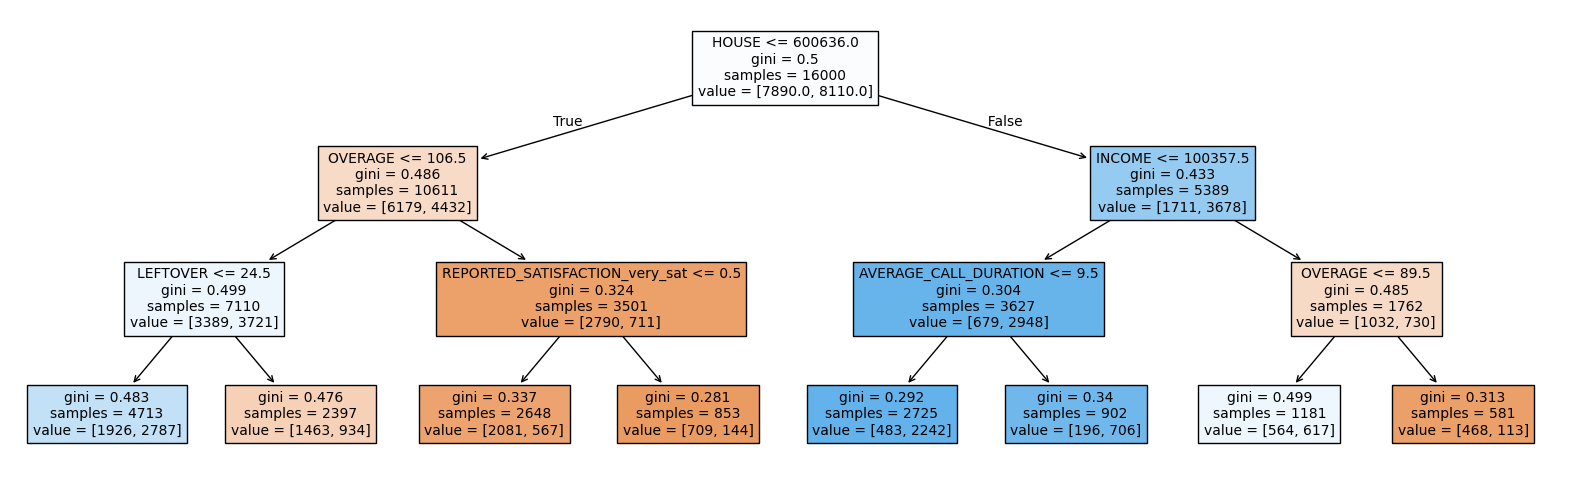

In [ ]:
model2 = DecisionTreeClassifier(max_depth = 3)
model2.fit(x_train, y_train)

plt.figure(figsize = (20,6)) # 그림 사이즈 조절
plot_tree(model2, feature_names = x_train.columns,
          filled = True, fontsize = 10)

### (2) 변수 중요도

In [ ]:
print(x_train.columns)
print(model.feature_importances_)

Index(['COLLEGE', 'INCOME', 'OVERAGE', 'LEFTOVER', 'HOUSE', 'HANDSET_PRICE',
       'OVER_15MINS_CALLS_PER_MONTH', 'AVERAGE_CALL_DURATION',
       'REPORTED_SATISFACTION_sat', 'REPORTED_SATISFACTION_unsat',
       'REPORTED_SATISFACTION_very_sat', 'REPORTED_SATISFACTION_very_unsat',
       'REPORTED_USAGE_LEVEL_high', 'REPORTED_USAGE_LEVEL_little',
       'REPORTED_USAGE_LEVEL_very_high', 'REPORTED_USAGE_LEVEL_very_little',
       'CONSIDERING_CHANGE_OF_PLAN_considering',
       'CONSIDERING_CHANGE_OF_PLAN_never_thought',
       'CONSIDERING_CHANGE_OF_PLAN_no', 'CONSIDERING_CHANGE_OF_PLAN_perhaps'],
      dtype='object')
[0.02204888 0.18517816 0.15751511 0.09494871 0.20927116 0.11334544
 0.05002117 0.04663025 0.00529619 0.00928334 0.01084023 0.00973469
 0.0065546  0.01278468 0.01192504 0.01511994 0.01415166 0.00679661
 0.01198758 0.00656658]


* 변수중요도 그래프 그리기 함수 만들기

In [ ]:
def plot_feature_importance(importance, names):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_df.reset_index(drop=True, inplace = True)

    plt.figure(figsize=(10,8))
    sns.barplot(x='feature_importance', y='feature_names', data = fi_df)

    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    plt.grid()

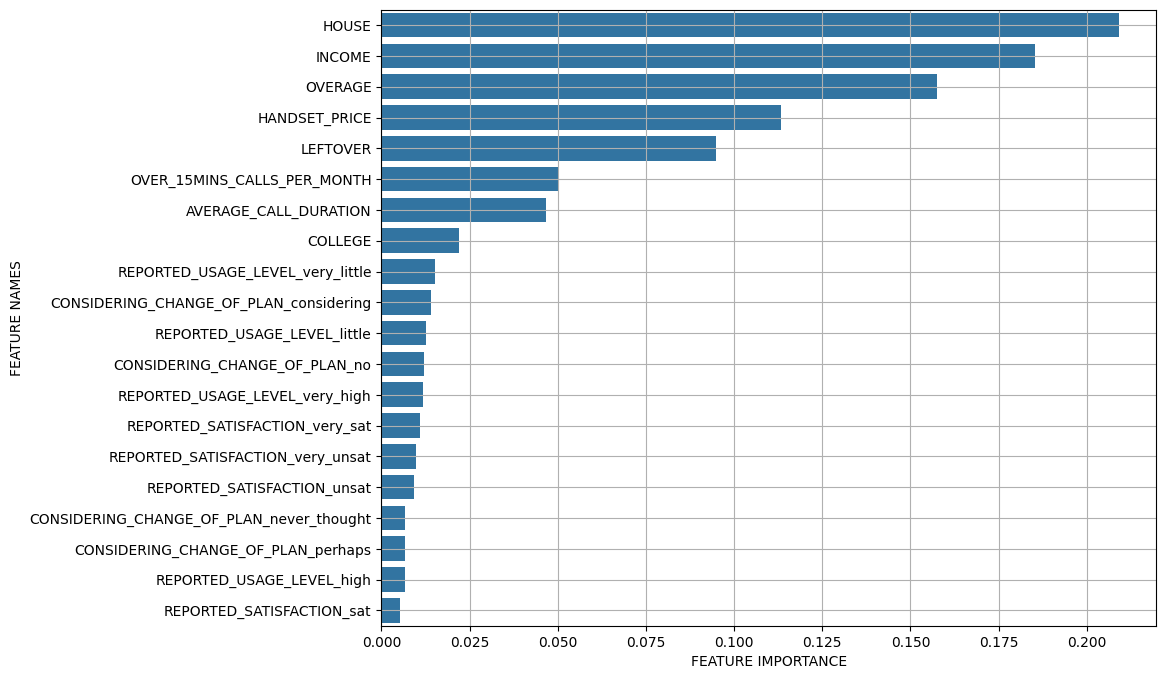

In [ ]:
plot_feature_importance(model.feature_importances_, list(x_train))

:### (3) 실습 Hyper Parameter 다루기
* 다음의 조건으로 모델 생성, 시각화, 성능 비교를 수행해 봅시다.
    * max_depth : 1,2,3,4,5



Max Depth: 1
              precision    recall  f1-score   support

       LEAVE     0.5816    0.7773    0.6654      1962
        STAY     0.6829    0.4617    0.5509      2038

    accuracy                         0.6165      4000
   macro avg     0.6322    0.6195    0.6081      4000
weighted avg     0.6332    0.6165    0.6071      4000

Accuracy: 0.6165

Max Depth: 2
              precision    recall  f1-score   support

       LEAVE     0.7062    0.4888    0.5777      1962
        STAY     0.6204    0.8042    0.7004      2038

    accuracy                         0.6495      4000
   macro avg     0.6633    0.6465    0.6391      4000
weighted avg     0.6625    0.6495    0.6402      4000

Accuracy: 0.6495

Max Depth: 3
              precision    recall  f1-score   support

       LEAVE     0.7242    0.5928    0.6519      1962
        STAY     0.6662    0.7826    0.7198      2038

    accuracy                         0.6895      4000
   macro avg     0.6952    0.6877    0.6858      400

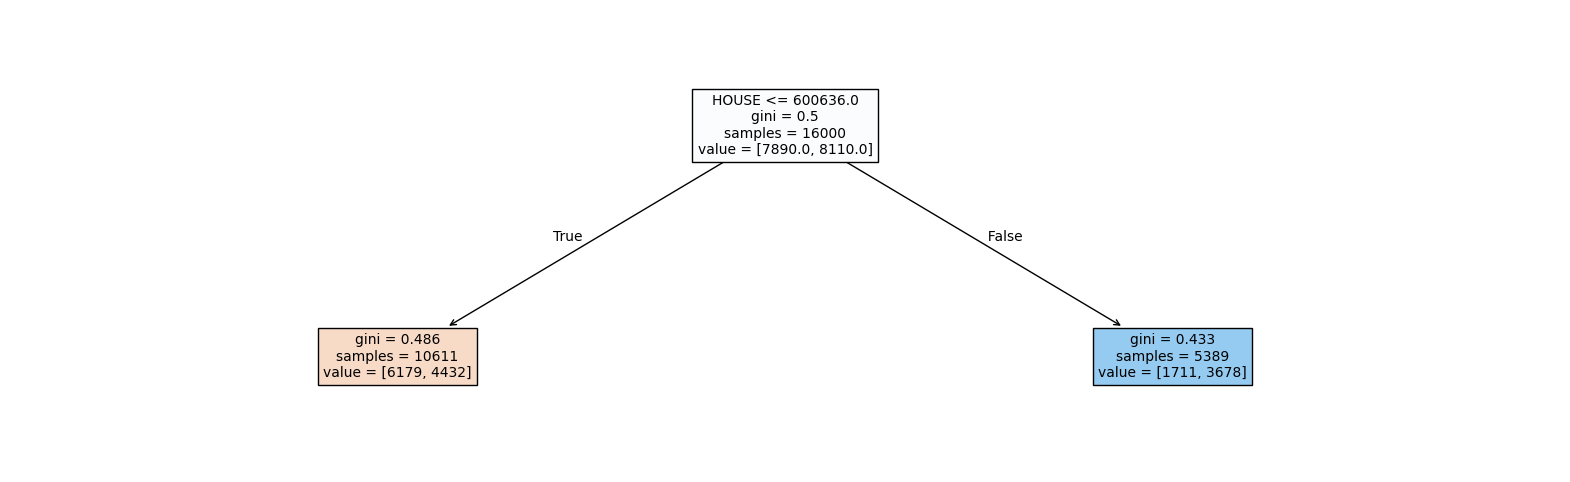

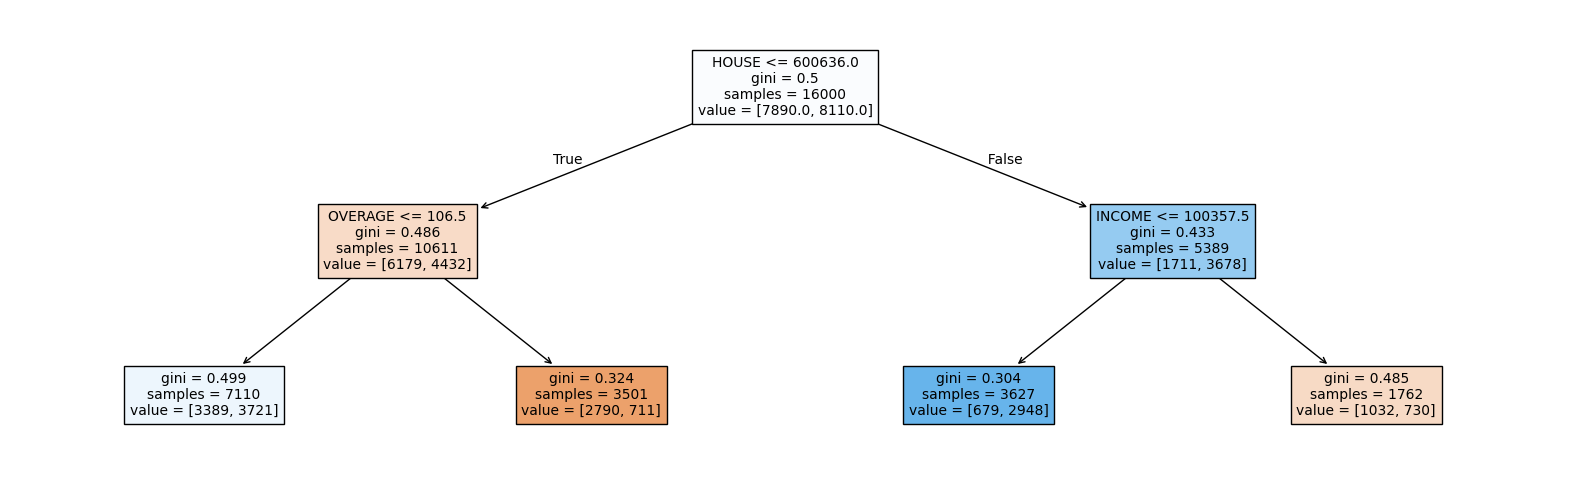

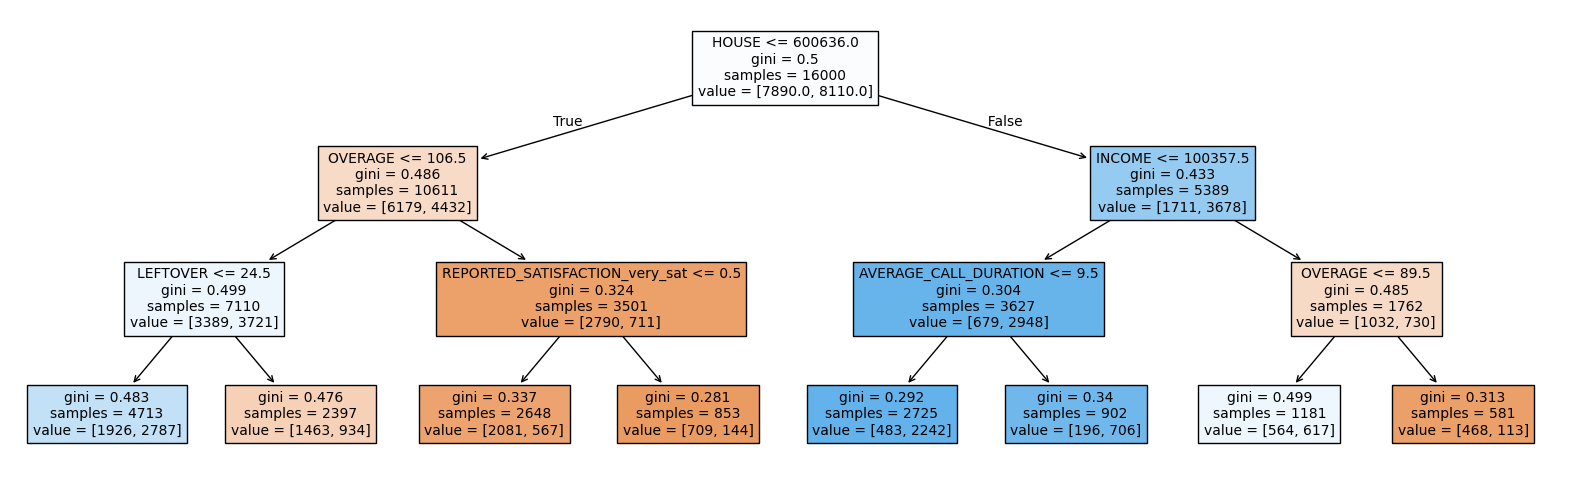

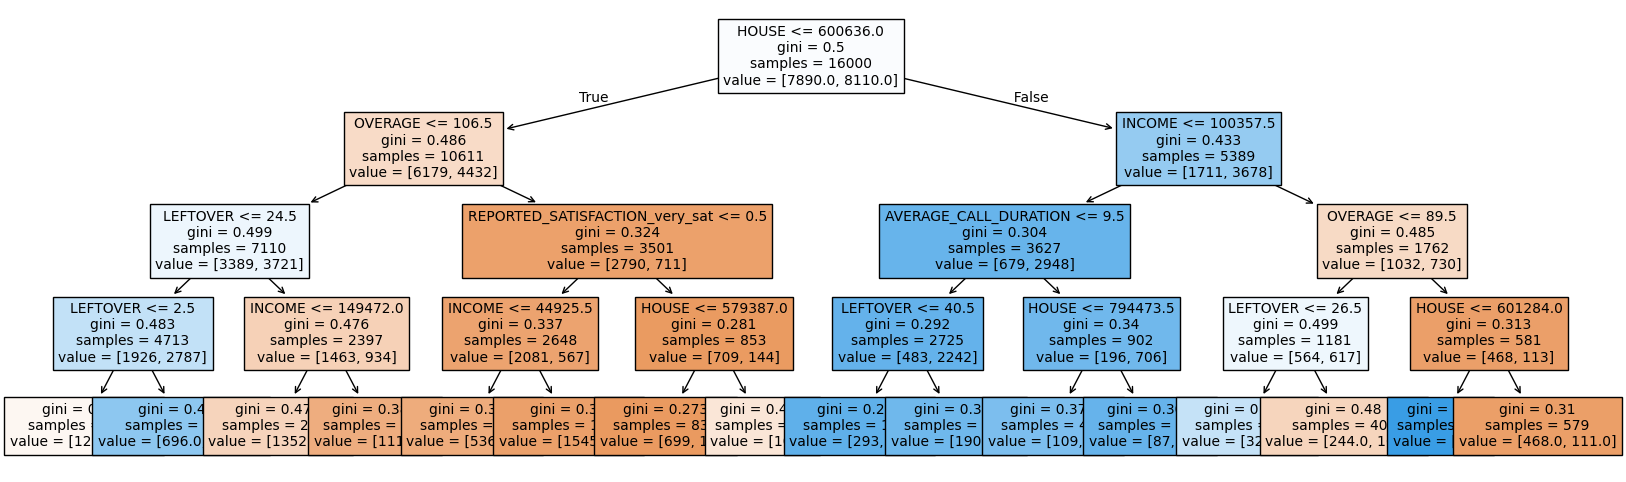

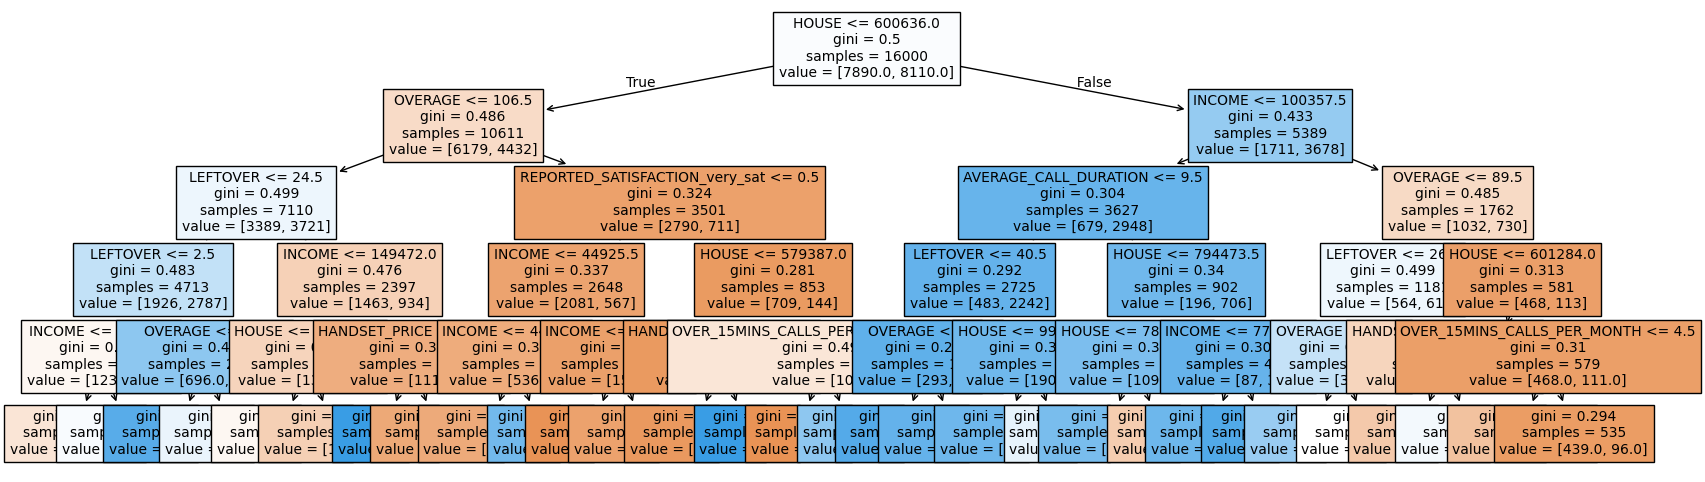

In [ ]:
for i in range(1,6):
    model = DecisionTreeClassifier(max_depth = i)
    model.fit(x_train, y_train)

    plt.figure(figsize = (20,6)) # 그림 사이즈 조절
    plot_tree(model, feature_names = x_train.columns,
          filled = True, fontsize = 10)

    pred = model.predict(x_val)

    print(f"\nMax Depth: {i}")
    # classification report 출력
    print(classification_report(y_val, pred, digits = 4))

    # 정확도 계산 및 출력
    accuracy = accuracy_score(y_val, pred)
    print(f"Accuracy: {accuracy:.4f}")
